In [1]:
def bubbleSort(lst):
    '''Returns a sorted list using bubble sort. O(n^2)'''
    isSorted = False
    end = len(lst)
    while not isSorted:
        isSorted = True
        for idx in range(1, end):
            if lst[idx-1] > lst[idx]:
                isSorted = False
                lst[idx-1], lst[idx] = lst[idx], lst[idx-1]
        end -= 1


def selectionSort(lst):
    '''Returns a sorted list using selection sort. O(n^2)'''
    end = len(lst) - 1
    while end > 0:
        maxNum = lst[0]
        swapIdx = 0
        for idx in range(end+1):
            if maxNum < lst[idx]:
                maxNum = lst[idx]
                swapIdx = idx
        lst[swapIdx], lst[end] = lst[end], lst[swapIdx]
        end -= 1
        
        
def insertionSort(lst):
    '''Returns a sorted list using insertion sort. O(n) - O(n^2)'''
    for i in range(1, len(lst)):
        val = lst[i]
        idx = i
        while lst[idx - 1] > val and idx > 0:
            lst[idx] = lst[idx-1]
            idx -= 1
        lst[idx] = val
        
        
def shellSort(lst):
    '''Returns a sorted list using shell sort.'''
    gap = len(lst) // 2
    while gap > 0:
        for i in range(gap):
            # Perform insertion sort for sublist
            start = i
            end = gap * (len(lst) // gap) - i
            for j in range(start + gap, len(lst), gap):
                val = lst[j]
                idx = j
                while lst[idx - gap] > val and idx > start:
                    lst[idx] = lst[idx-1]
                    idx -= gap
                lst[idx] = val
        gap //= 2

    
def mergeSort(lst):
    '''Returns a sorted list using merge sort. Guaranteed O(n log(n))'''
    if len(lst) <= 1:
        return lst

    left = lst[:len(lst)//2]
    right = lst[len(lst)//2:]
    
    left = mergeSort(left)
    right = mergeSort(right)
        
    # Construct result
    result = []
    i, j = 0, 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
            
    # Append remaining values into result
    while i < len(left):
        result.append(left[i])
        i += 1
    while j < len(right):
        result.append(right[j])
        j += 1
        
    return result
    
    
def quickSort(lst, start, end):
    '''Returns a sorted list using quick sort. 
    O(1) space, O(n log(n)) time (average) but O(n^2) worst
    '''
    if len(lst) <= 1:
        return

    # Partition lst
    if (end - start) >= 1:
        pivot = quickSort_partition(lst, start, end)
        quickSort(lst, start, pivot-1)
        quickSort(lst, pivot+1, end)

    
def quickSort_partition(lst, start, end):
    '''Helper function for quick sort.
    Hoare's partition scheme
    '''
    i, j = start - 1, end
    direction = True   # True: i moves up, False: j moves down
    while j > i:
        if direction:
            i += 1
            if lst[i] > lst[j]:
                lst[i], lst[j] = lst[j], lst[i]
                direction = not(direction)
        else:
            j -= 1
            if lst[i] > lst[j]:
                lst[j], lst[i] = lst[i], lst[j]
                direction = not(direction)          
    return j # pivot

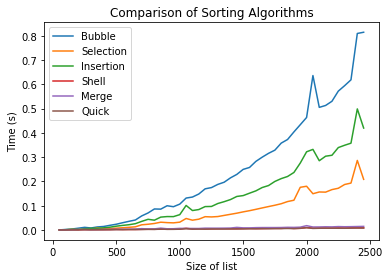

In [4]:
from timeit import Timer
import random
from matplotlib import pyplot as plt


bubble_Times = []
select_Times = []
insert_Times = []
shell_Times = []
merge_Times = []
quick_Times = []
for length in range(50, 2500, 50):
    bubble_Timer = Timer('bubbleSort(lst)',
                         'from __main__ import bubbleSort, lst')
    select_Timer = Timer('selectionSort(lst)',
                         'from __main__ import selectionSort, lst')
    insert_Timer = Timer('insertionSort(lst)',
                         'from __main__ import insertionSort, lst')
    shell_Timer = Timer('shellSort(lst)',
                         'from __main__ import shellSort, lst')
    merge_Timer = Timer('mergeSort(lst)',
                         'from __main__ import mergeSort, lst')
    quick_Timer = Timer('quickSort(lst, 0, len(lst)-1)',
                         'from __main__ import quickSort, lst')
    
    lst = [random.randrange(length) for _ in range(length)]
    bubble_Time = bubble_Timer.timeit(number = 1)
    lst = [random.randrange(length) for _ in range(length)]
    select_Time = select_Timer.timeit(number = 1)
    lst = [random.randrange(length) for _ in range(length)]
    insert_Time = insert_Timer.timeit(number = 1)
    lst = [random.randrange(length) for _ in range(length)]
    shell_Time = shell_Timer.timeit(number = 1)
    lst = [random.randrange(length) for _ in range(length)]
    merge_Time = merge_Timer.timeit(number = 1)
    lst = [random.randrange(length) for _ in range(length)]
    quick_Time = quick_Timer.timeit(number = 1)
    
    bubble_Times.append(bubble_Time)
    select_Times.append(select_Time)
    insert_Times.append(insert_Time)
    shell_Times.append(shell_Time)
    merge_Times.append(merge_Time)
    quick_Times.append(quick_Time)

plt.plot(range(50, 2500, 50), bubble_Times, label='Bubble')
plt.plot(range(50, 2500, 50), select_Times, label='Selection')
plt.plot(range(50, 2500, 50), insert_Times, label='Insertion')
plt.plot(range(50, 2500, 50), shell_Times, label='Shell')
plt.plot(range(50, 2500, 50), merge_Times, label='Merge')
plt.plot(range(50, 2500, 50), quick_Times, label='Quick')
plt.legend()
plt.xlabel('Size of list')
plt.ylabel('Time (s)')
plt.title('Comparison of Sorting Algorithms')
plt.show()